In [1]:
import numpy as np
import pystokes
import matplotlib.pyplot as plt

In [2]:
dim = 2;
a, Np = 1, 1
Nx, Ny = 128, 128
Lx, Ly = 128, 128
v = np.zeros(dim*Nx*Ny); 
p = np.zeros(dim*Np); 
S = np.zeros(2*Np); 
r = np.zeros(dim*Np); 
r[0] = Nx/2 


p[:Np] = 1
r[Np:2*Np]=Ny/2
S[:Np] = p[:Np]*p[:Np] -0.5
S[Np:2*Np] = p[:Np]*p[Np:2*Np]


mFlow = pystokes.mima.Mima2D(a, Np, Lx, Ly, Nx, Ny);
mFlow.flowField2s(v, r, S, a/3, 10)

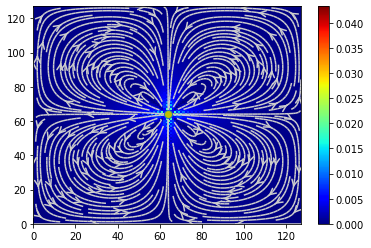

In [3]:
vx = v[0:Nx*Ny       ].reshape(Nx, Ny)
vy = v[Nx*Ny:2*Nx*Ny ].reshape(Nx, Ny)
x, y = np.meshgrid(range(Nx), range(Ny) )
plt.figure()
rx = r[0:Np]
ry = r[Np:2*Np]
plt.pcolor(x, y, np.sqrt(vx*vx + vy*vy), cmap=plt.cm.jet)
plt.colorbar()
plt.plot(rx, ry, marker='o', markerfacecolor='y', markersize=8 ) 
plt.streamplot(x, y, vx, vy, density=2, color=[0.8,0.8,0.8], arrowstyle='->', arrowsize =1.5)
plt.xlim([0, Lx-1]); plt.ylim([0, Ly-1]); plt.show() 